In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import os, glob
import numpy as np

Merge all files into one CVS file

In [180]:
os.chdir(".")
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
combinedf = pd.concat([pd.read_csv(f) for f in all_filenames ],sort=False)
combinedf.to_csv( "Teams.csv", index=False, encoding='utf-8')

In [2]:
teams = pd.read_csv('Teams.csv')

In [59]:
Best = teams.copy()
Champions = teams.copy()
Winners = teams.copy()
aggressive = teams.copy()
squad_at = teams.copy()
teams_stats = teams.copy()

Best League In Europe Based on Number Of Played ganes and scored goals

In [60]:
Best = Best.groupby('League').sum()
Best.sort_values(by=['GF'], inplace=True, ascending=False)
Best.drop(['D', 'L', 'GDiff', 'Rk', 'W'], axis=1, inplace=True)
Best.head()

,MP,GF,GA,Pts
League,,,,
Serie A,2280,3190,3190,3141
EPL,2280,3124,3124,3158
La Liga,2280,2949,2949,3119
Bundesliga,1836,2810,2810,2530
League 1,2078,2709,2709,2841


C:\Users\hanys\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Best League in Europe (2017-2020)')

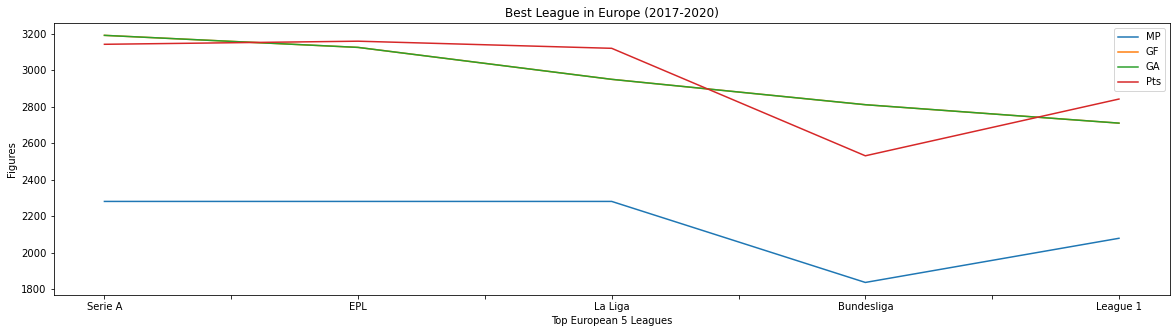

In [61]:
Best.plot.line()
plt.xlabel("Top European 5 Leagues")
plt.ylabel("Figures")
plt.title("Best League in Europe (2017-2020)")

In [62]:
#new_data = teams_stats.groupby('League')
#new_data.head()
new_data = teams_stats.groupby('League').sum()
new_data.sort_values(by=['GF'], inplace=True, ascending=False)
new_teams_data = new_data.head(5)
new_teams_data.drop(['D', 'L', 'GDiff', 'Rk', 'W', 'GA', 'Pts'], axis=1, inplace=True)
new_teams_data.head()

C:\Users\hanys\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MP,GF
League,,
Serie A,2280,3190
EPL,2280,3124
La Liga,2280,2949
Bundesliga,1836,2810
League 1,2078,2709


Italian League is the best European league from 2017 till 2020 based on number of Played Games and number of Scored Goals

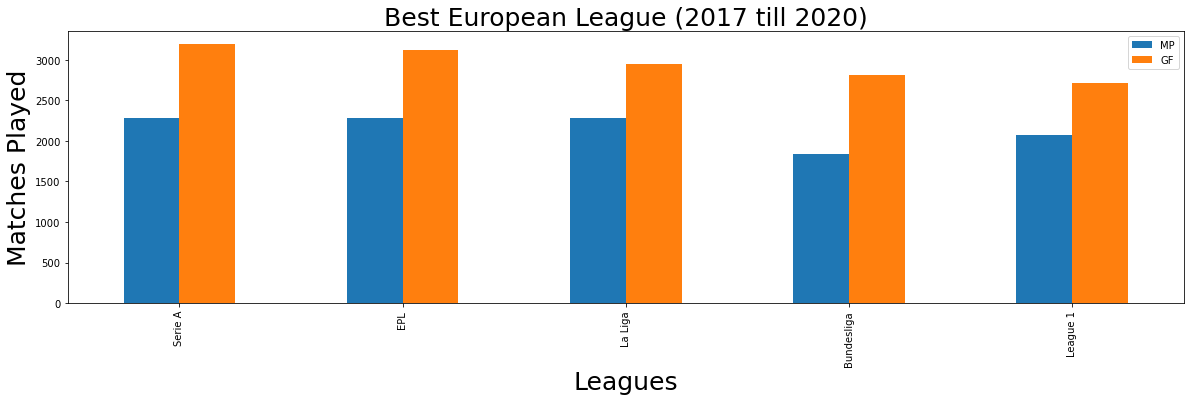

In [63]:
new_teams_data.plot.bar()
plt.xlabel("Leagues", fontsize=25)
plt.ylabel("Matches Played", fontsize=25)
plt.title("Best European League (2017 till 2020)", fontsize=25)
plt.rcParams['figure.figsize'] = (25,5);
plt.show()

Manchester City is the best European team from 2017 till 2020 based on number of Played Games, 
collected points and number of Scored Goals

In [64]:
Squad = teams_stats.groupby('Squad').sum()
Squad.sort_values(by=['Pts'], inplace=True, ascending=False)
best_team = Squad.head()
best_team.drop(['D', 'L', 'GDiff', 'Rk', 'W'], axis=1, inplace=True)
best_team.head()

C:\Users\hanys\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MP,GF,GA,Pts
Squad,,,,
Manchester City,114,303,85,279
Liverpool,114,258,93,271
Juventus,114,232,97,268
Barcelona,114,275,103,262
Paris S-G,103,288,88,252


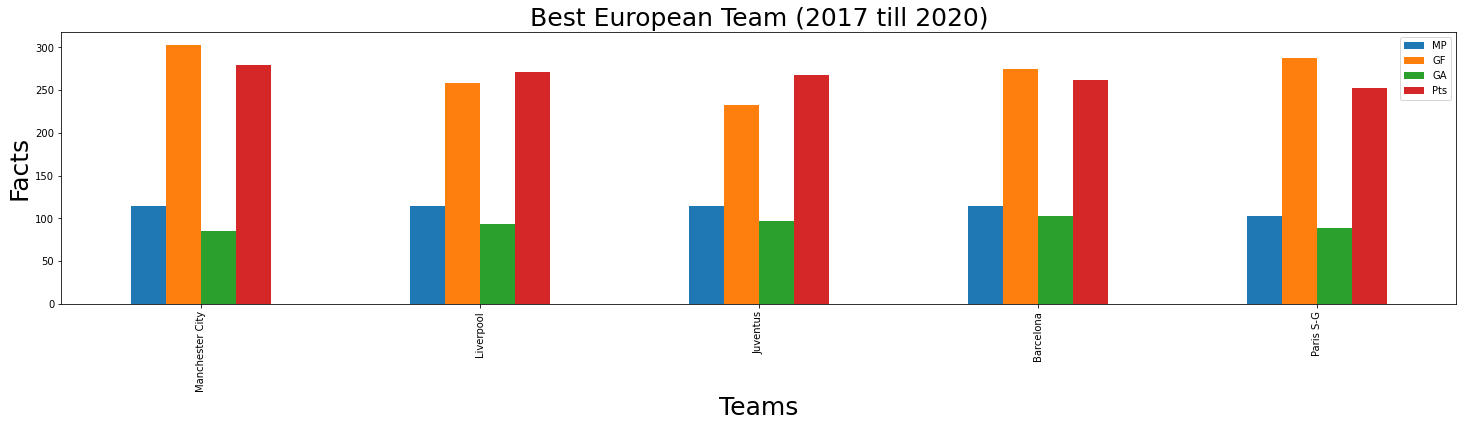

In [65]:
best_team.plot.bar()
plt.xlabel('Teams', fontsize=25)
plt.ylabel("Facts", fontsize=25)
plt.title("Best European Team (2017 till 2020)", fontsize=25)
plt.rcParams['figure.figsize'] = (20,5);
plt.show()

League Champions

In [56]:
Winners.head(25)
condition = Winners["Winner"] == 'Champion'

League_Champions = Winners[condition]

In [57]:
League_Champions = League_Champions.set_index(['Season', 'League', 'Squad']).select_dtypes('number')
League_Champions.drop(['Rk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GDiff'], axis=1, inplace=True)
League_Champions.head(15)

Pts
Season    League     Squad               
2017-2018 Bundesliga Bayern Munich     84
          La Liga    Barcelona         93
          League 1   Paris S-G         93
          EPL        Manchester City  100
          Serie A    Juventus          95
2018-2019 Bundesliga Bayern Munich     78
          La Liga    Barcelona         87
          League 1   Paris S-G         91
          EPL        Manchester City   98
          Serie A    Juventus          90
2019-2020 Bundesliga Bayern Munich     82
          La Liga    Real Madrid       87
          League 1   Paris S-G         68
          EPL        Liverpool         99
          Serie A    Juventus          83

C:\Users\hanys\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'European League Champions Points Achieved (2017-2020)')

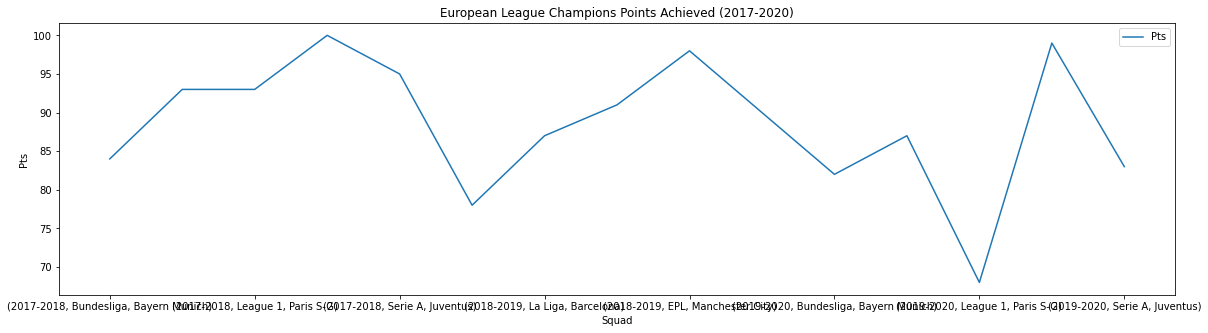

In [58]:
League_Champions.plot.line()
plt.xlabel("Squad")
plt.ylabel("Pts")
plt.title("European League Champions Points Achieved (2017-2020)")

<ipython-input-28-964f980a0f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  League_Champions.sort_values(by=['Pts'], inplace=True, ascending=False)


Text(0.5, 1.0, 'European League Champions Points Achieved (2017-2020) Sorted')

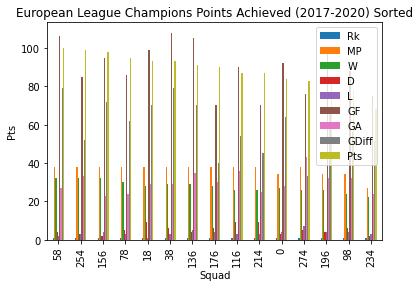

In [28]:
League_Champions.sort_values(by=['Pts'], inplace=True, ascending=False)
League_Champions.plot.bar()
plt.xlabel("Squad")
plt.ylabel("Pts")
plt.title("European League Champions Points Achieved (2017-2020) Sorted")